In [1]:
import pandas as pd
df = pd.read_csv('../datasets/lentil-samaranayaka/data.csv', delimiter='\t', index_col=0)

In [2]:
essentials = ['Histidine', 'Isoleucine', 'Leucine', 'Lysine', 'Methionine', 'Phenylalanine', 'Threonine', 'Tryptophan', 'Valine']

<Axes: xlabel='Amino Acid'>

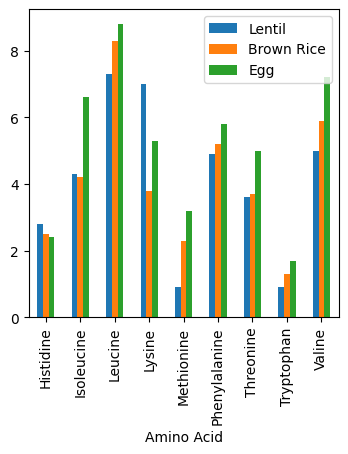

In [3]:
df[['Lentil', 'Brown Rice', 'Egg']].loc[essentials].plot(kind='bar', figsize=(4,4))

# Get lentil profile

In [4]:
df['Lentil'].sum()

92.10000000000001

In [5]:
lentil_protein = (df['Lentil'] / df['Lentil'].sum())[essentials]
lentil_protein, lentil_protein.sum()

(Amino Acid
 Histidine        0.030402
 Isoleucine       0.046688
 Leucine          0.079262
 Lysine           0.076004
 Methionine       0.009772
 Phenylalanine    0.053203
 Threonine        0.039088
 Tryptophan       0.009772
 Valine           0.054289
 Name: Lentil, dtype: float64,
 0.39847991313789355)

# Get rice profile

In [6]:
# [g/100g of rice protein]
rice_df = pd.read_csv('../datasets/rice-polymers2022/data.csv', index_col=0, delimiter=' ', header=None, names=['Amino acid', 'contents'])

In [7]:
rice_df

,contents
Amino acid,
Threonine,2.09
Valine,3.78
Isoleucine,2.69
Leucine,5.30
Lysine,2.20
Histidine,1.19
Cystine,0.13
Tyrosine,1.33
MethioninePlusCystine,2.35


In [8]:
rice_sum_of_protein = rice_df['contents'].sum() + 8.1 + 2.96 + 13.36 + 4.21 + 3.69 + 5.30 + 2.70
rice_sum_of_protein

68.18

In [9]:
rice_protein = rice_df['contents'] / rice_sum_of_protein
rice_protein.sum()

0.408624229979466

# Get egg profile

In [35]:
egg_protein = (df['Egg'] / df['Egg'].sum())[essentials]
egg_protein['MethioninePlusCystine'] = (df['Egg']['Methionine'] + df['Egg']['Cystine']) / df['Egg'].sum()
egg_protein.sum()

0.5276639344262296

# Get requirements

In [10]:
# mg/kg of bodyweight
requirements = pd.read_csv('../datasets/amino-acid-requirements-1985/data.csv', index_col=0, header=None, delimiter=' ', names=['Amino acid', 'contents'])
requirements

,contents
Amino acid,
Histidine,12.0
Isoleucine,10.0
Leucine,14.0
Lysine,12.0
MethioninePlusCystine,13.0
PhenylalaninePlusTyrosine,14.0
Threonine,7.0
Tryptophan,3.5
Valine,10.0


In [11]:
my_mass = 70  # kg

In [12]:
# lysine, methionine
lysine_requirement = requirements['contents']['Lysine'] * my_mass / 1000
methionine_requirement = requirements['contents']['MethioninePlusCystine'] * my_mass / 1000

lysine_requirement, methionine_requirement  # g per day for me

(0.84, 0.91)

# Get dry product requirements

In [42]:
# 6.8g/100g of dry rice, Biedronka
rice_protein_per_100g = 6.8
lentil_protein_per_100g = 26
egg_protein_per_100g = 13
egg_mass = 68

In [36]:
rice_methionine_per_100g = rice_protein['MethioninePlusCystine'] * rice_protein_per_100g

lentil_protein['MethioninePlusCystine'] = (df['Lentil']['Methionine'] + df['Lentil']['Cystine']) / df['Lentil'].sum()
lentil_methionine_per_100g = lentil_protein['MethioninePlusCystine'] * lentil_protein_per_100g

rice_lysine_per_100g = rice_protein['Lysine'] * rice_protein_per_100g
lentil_lysine_per_100g = lentil_protein['Lysine'] * lentil_protein_per_100g

egg_lysine_per_100g = egg_protein['Lysine'] * egg_protein_per_100g
egg_methionine_per_100g = egg_protein['MethioninePlusCystine'] * egg_protein_per_100g

In [37]:
rice_lysine_per_100g, rice_methionine_per_100g

(0.21941918451158698, 0.2343795834555588)

In [38]:
lentil_lysine_per_100g, lentil_methionine_per_100g

(1.9761129207383277, 0.6210640608034745)

In [39]:
rice_mass = 100
lentil_mass = 50

In [40]:
print('Lysine required daily:', lysine_requirement)
print('Consumed:', rice_lysine_per_100g * rice_mass / 100 + lentil_lysine_per_100g * lentil_mass / 100)

Lysine required daily: 0.84
Consumed: 1.2074756448807509


In [41]:
print('Methionine + cystine required daily:', methionine_requirement)
print('Consumed:', rice_methionine_per_100g * rice_mass / 100 + lentil_methionine_per_100g * lentil_mass / 100)

Methionine + cystine required daily: 0.91
Consumed: 0.544911613857296


In [43]:
egg_mass * egg_methionine_per_100g / 100

0.498155737704918